In [11]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

"""
Type 1 - Count & Probability for Discrete variable
Type 2 - Equal Bin Size, Count & Probability for Continuous variable
Type 3 - Normalized Count for Discrete variable
Type 4 - Equal Bin Size, Normalized Count for Continuous variable
"""

In [2]:
preg_raw = pd.read_csv("2002FemPregOut.csv")
reps_raw = pd.read_csv("2002FemRespOut.csv")

In [4]:
preg_raw = preg_raw.dropna()
preg_raw.head()

,caseid,nbrnaliv,babysex,birthwgt_lb,birthwgt_oz,prglngth,outcome,birthord,agepreg,finalwgt
0,1,1.0,1.0,8.0,13.0,39,1,1.0,3316.0,6448.271112
1,1,1.0,2.0,7.0,14.0,39,1,2.0,3925.0,6448.271112
2,2,3.0,1.0,9.0,2.0,39,1,1.0,1433.0,12999.542264
3,2,1.0,2.0,7.0,0.0,39,1,2.0,1783.0,12999.542264
4,2,1.0,2.0,6.0,3.0,39,1,3.0,1833.0,12999.542264


In [8]:
birthorder_ct = preg_raw[['birthord', 'caseid']]\
                      .groupby(['birthord'])['caseid']\
                      .agg(['count'])\
                      .sort_values(['count'], ascending=False)
print birthorder_ct
print birthorder_ct.sum()

          count
birthord       
1.0        4381
2.0        2861
3.0        1225
4.0         417
5.0         125
6.0          49
7.0          19
8.0           7
9.0           2
10.0          1
count    9087
dtype: int64


In [10]:
# Type 1 - Count & Probability for Discrete variable
birthorder_ct['prob'] = birthorder_ct/birthorder_ct.sum()
birthorder_ct

,count,prob
birthord,,
1.0,4381,0.482117
2.0,2861,0.314845
3.0,1225,0.134808
4.0,417,0.045890
5.0,125,0.013756
6.0,49,0.005392
7.0,19,0.002091
8.0,7,0.000770
9.0,2,0.000220


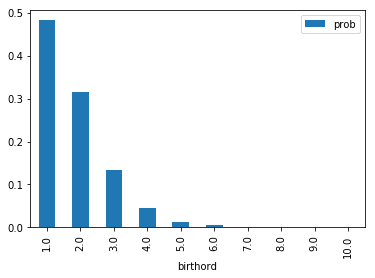

In [22]:
birthorder_ct.plot.bar(x=birthorder_ct.index, y='prob')

In [26]:
# Type 3 - Normalized Count for Discrete variable
## normalize to [0,1] range
birthorder_ct['normalized_ct'] = (birthorder_ct['count']-birthorder_ct['count'].min())/(birthorder_ct['count'].max()-birthorder_ct['count'].min())
birthorder_ct

,count,prob,normalized_ct
birthord,,,
1.0,4381,0.482117,1.000000
2.0,2861,0.314845,0.652968
3.0,1225,0.134808,0.279452
4.0,417,0.045890,0.094977
5.0,125,0.013756,0.028311
6.0,49,0.005392,0.010959
7.0,19,0.002091,0.004110
8.0,7,0.000770,0.001370
9.0,2,0.000220,0.000228


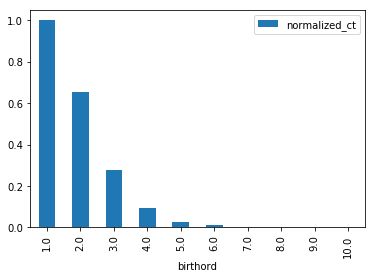

In [27]:
birthorder_ct.plot.bar(x=birthorder_ct.index, y='normalized_ct')